Purpose: Run PCA for data from each individual stressor and its associated control samples.<br>
Author: Anna Pardo<br>
Date initiated: July 6, 2023

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from combat.pycombat import pycombat

In [2]:
# load data
tpm = pd.read_csv("../../data/rawtpm_bptreat_noPEG.tsv",sep="\t",header="infer")
tpm.head()

,Sample,BioProject,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR11933261,PRJNA637522,Drought,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
1,SRR11933272,PRJNA637522,Drought,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
2,SRR11933250,PRJNA637522,Drought,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
3,SRR11933029,PRJNA637522,Control,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
4,SRR11933040,PRJNA637522,Drought,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [3]:
# define a function from an answer in https://stackoverflow.com/questions/39812885/retain-feature-names-after-scikit-feature-selection
def variance_threshold_selector(data):
    selector = VarianceThreshold()
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [4]:
# start by running the PCA for heat
## subset data to only heat and its associated control
## to do so, select BioProjects containing heat samples

heatbp = []
for b in tpm["BioProject"].unique():
    df = tpm[tpm["BioProject"]==b]
    if "Heat" in df["Treatment"].unique():
        heatbp.append(b)
heatbp

['PRJNA506720',
 'PRJNA244661',
 'PRJNA747925',
 'PRJNA520822',
 'PRJNA548548',
 'PRJNA791560',
 'PRJNA349117',
 'PRJNA646054']

In [5]:
# subset to contain only the heat BioProjects
heattpm = tpm[tpm["BioProject"].isin(heatbp)]
heattpm.head()

,Sample,BioProject,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
49,SRR8239716,PRJNA506720,Control,13.307581,0.621747,0.705166,12.834716,0.00000,12.535524,0.000000,...,0.000000,0.074918,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
50,SRR8239717,PRJNA506720,Control,12.099089,1.153982,0.427002,12.453924,0.13578,14.098531,0.097319,...,0.000000,0.055655,0.0,0.0,0.000000,2.025144,0.0,0.0,0.0,0.0
51,SRR8239718,PRJNA506720,Control,11.614700,0.888177,0.225754,12.843784,0.00000,13.097301,0.076766,...,0.000000,0.030974,0.0,0.0,0.000000,0.745324,0.0,0.0,0.0,0.0
52,SRR8239725,PRJNA506720,Heat,21.851277,3.355300,0.000000,23.267709,0.13253,33.187876,0.680749,...,0.052413,0.026037,0.0,0.0,0.000000,12.167677,0.0,0.0,0.0,0.0
53,SRR8239726,PRJNA506720,Heat,20.513799,3.770040,0.000000,22.634640,0.00000,28.939382,0.992501,...,0.115351,0.078221,0.0,0.0,0.435959,19.795565,0.0,0.0,0.0,0.0


In [6]:
heattpm["Treatment"].unique()

array(['Control', 'Heat', 'Cold', 'Salt'], dtype=object)

In [7]:
# remove all samples not Control or Heat
heattpm = heattpm[heattpm["Treatment"].isin(["Control","Heat"])]
heattpm["Treatment"].unique()

array(['Control', 'Heat'], dtype=object)

In [8]:
# split off metadata temporarily
meta = heattpm[["Sample","BioProject","Treatment"]]
meta.head()

,Sample,BioProject,Treatment
49,SRR8239716,PRJNA506720,Control
50,SRR8239717,PRJNA506720,Control
51,SRR8239718,PRJNA506720,Control
52,SRR8239725,PRJNA506720,Heat
53,SRR8239726,PRJNA506720,Heat


In [9]:
# set Sample as index and drop metadata from TPM
heattpm = heattpm.set_index("Sample").drop(["BioProject","Treatment"],axis=1)
heattpm.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR8239716,13.307581,0.621747,0.705166,12.834716,0.00000,12.535524,0.000000,0.0,1.554009,0.0,...,0.000000,0.074918,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
SRR8239717,12.099089,1.153982,0.427002,12.453924,0.13578,14.098531,0.097319,0.0,2.458748,0.0,...,0.000000,0.055655,0.0,0.0,0.000000,2.025144,0.0,0.0,0.0,0.0
SRR8239718,11.614700,0.888177,0.225754,12.843784,0.00000,13.097301,0.076766,0.0,0.740236,0.0,...,0.000000,0.030974,0.0,0.0,0.000000,0.745324,0.0,0.0,0.0,0.0
SRR8239725,21.851277,3.355300,0.000000,23.267709,0.13253,33.187876,0.680749,0.0,2.913293,0.0,...,0.052413,0.026037,0.0,0.0,0.000000,12.167677,0.0,0.0,0.0,0.0
SRR8239726,20.513799,3.770040,0.000000,22.634640,0.00000,28.939382,0.992501,0.0,1.679541,0.0,...,0.115351,0.078221,0.0,0.0,0.435959,19.795565,0.0,0.0,0.0,0.0


In [10]:
# remove zero-variance features
vttpm = variance_threshold_selector(heattpm)
vttpm.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR8239716,13.307581,0.621747,0.705166,12.834716,0.00000,12.535524,0.000000,0.0,1.554009,0.0,...,0.000000,0.074918,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
SRR8239717,12.099089,1.153982,0.427002,12.453924,0.13578,14.098531,0.097319,0.0,2.458748,0.0,...,0.000000,0.055655,0.0,0.0,0.000000,2.025144,0.0,0.0,0.0,0.0
SRR8239718,11.614700,0.888177,0.225754,12.843784,0.00000,13.097301,0.076766,0.0,0.740236,0.0,...,0.000000,0.030974,0.0,0.0,0.000000,0.745324,0.0,0.0,0.0,0.0
SRR8239725,21.851277,3.355300,0.000000,23.267709,0.13253,33.187876,0.680749,0.0,2.913293,0.0,...,0.052413,0.026037,0.0,0.0,0.000000,12.167677,0.0,0.0,0.0,0.0
SRR8239726,20.513799,3.770040,0.000000,22.634640,0.00000,28.939382,0.992501,0.0,1.679541,0.0,...,0.115351,0.078221,0.0,0.0,0.435959,19.795565,0.0,0.0,0.0,0.0


In [11]:
len(heattpm.columns)-len(vttpm.columns)

700

700 zero-variance genes were removed.

In [12]:
# log-transform TPM
vttpm_log = vttpm.apply(lambda x: np.log2(x+1))
vttpm_log.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR8239716,3.838708,0.697549,0.769912,3.790221,0.000000,3.758679,0.000000,0.0,1.352764,0.0,...,0.000000,0.104227,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
SRR8239717,3.711395,1.107006,0.512987,3.749955,0.183683,3.916336,0.133983,0.0,1.790250,0.0,...,0.000000,0.078138,0.0,0.0,0.000000,1.597004,0.0,0.0,0.0,0.0
SRR8239718,3.657034,0.916994,0.293669,3.791166,0.000000,3.817347,0.106705,0.0,0.799283,0.0,...,0.000000,0.044008,0.0,0.0,0.000000,0.803495,0.0,0.0,0.0,0.0
SRR8239725,4.514203,2.122772,0.000000,4.600966,0.179549,5.095413,0.749104,0.0,1.968383,0.0,...,0.073701,0.037083,0.0,0.0,0.000000,3.718929,0.0,0.0,0.0,0.0
SRR8239726,4.427190,2.254001,0.000000,4.562831,0.000000,4.903973,0.994580,0.0,1.421986,0.0,...,0.157498,0.108653,0.0,0.0,0.522015,4.378204,0.0,0.0,0.0,0.0


In [13]:
# run PCA and generate dataframe with PCs
pca = PCA(n_components=2)
real_PCs = pca.fit_transform(vttpm_log)
real_PCs_df = pd.DataFrame(data = real_PCs, columns = ['PC1','PC2'])

In [14]:
# find the explained variance ratio
pca.explained_variance_ratio_

array([0.36391945, 0.19511013])

In [15]:
## reset index (after running PCA)
vttpm_log.reset_index(inplace=True)
vttpm_log.rename(columns={"index":"Sample"},inplace=True)
vttpm_log.head()

,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR8239716,3.838708,0.697549,0.769912,3.790221,0.000000,3.758679,0.000000,0.0,1.352764,...,0.000000,0.104227,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,SRR8239717,3.711395,1.107006,0.512987,3.749955,0.183683,3.916336,0.133983,0.0,1.790250,...,0.000000,0.078138,0.0,0.0,0.000000,1.597004,0.0,0.0,0.0,0.0
2,SRR8239718,3.657034,0.916994,0.293669,3.791166,0.000000,3.817347,0.106705,0.0,0.799283,...,0.000000,0.044008,0.0,0.0,0.000000,0.803495,0.0,0.0,0.0,0.0
3,SRR8239725,4.514203,2.122772,0.000000,4.600966,0.179549,5.095413,0.749104,0.0,1.968383,...,0.073701,0.037083,0.0,0.0,0.000000,3.718929,0.0,0.0,0.0,0.0
4,SRR8239726,4.427190,2.254001,0.000000,4.562831,0.000000,4.903973,0.994580,0.0,1.421986,...,0.157498,0.108653,0.0,0.0,0.522015,4.378204,0.0,0.0,0.0,0.0


In [16]:
# merge metadata with vttpm_log again
merged = meta.merge(vttpm_log)
merged.head()

,Sample,BioProject,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR8239716,PRJNA506720,Control,3.838708,0.697549,0.769912,3.790221,0.000000,3.758679,0.000000,...,0.000000,0.104227,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,SRR8239717,PRJNA506720,Control,3.711395,1.107006,0.512987,3.749955,0.183683,3.916336,0.133983,...,0.000000,0.078138,0.0,0.0,0.000000,1.597004,0.0,0.0,0.0,0.0
2,SRR8239718,PRJNA506720,Control,3.657034,0.916994,0.293669,3.791166,0.000000,3.817347,0.106705,...,0.000000,0.044008,0.0,0.0,0.000000,0.803495,0.0,0.0,0.0,0.0
3,SRR8239725,PRJNA506720,Heat,4.514203,2.122772,0.000000,4.600966,0.179549,5.095413,0.749104,...,0.073701,0.037083,0.0,0.0,0.000000,3.718929,0.0,0.0,0.0,0.0
4,SRR8239726,PRJNA506720,Heat,4.427190,2.254001,0.000000,4.562831,0.000000,4.903973,0.994580,...,0.157498,0.108653,0.0,0.0,0.522015,4.378204,0.0,0.0,0.0,0.0


In [17]:
# append metadata to PCA df
plotdf = pd.concat([real_PCs_df,merged[["Sample","BioProject","Treatment"]]],axis=1)
plotdf.head()

,PC1,PC2,Sample,BioProject,Treatment
0,-52.804798,-7.772367,SRR8239716,PRJNA506720,Control
1,-51.531378,-7.056090,SRR8239717,PRJNA506720,Control
2,-53.052020,-14.254230,SRR8239718,PRJNA506720,Control
3,-129.542550,77.278099,SRR8239725,PRJNA506720,Heat
4,-128.442476,80.262406,SRR8239726,PRJNA506720,Heat


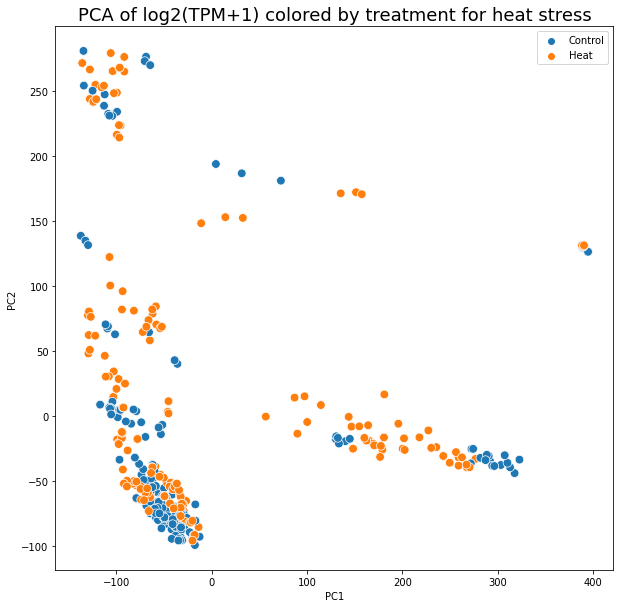

In [18]:
# plot the data: color by treatment
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Treatment"],s=75)
plt.title("PCA of log2(TPM+1) colored by treatment for heat stress",fontsize=18)
plt.legend()

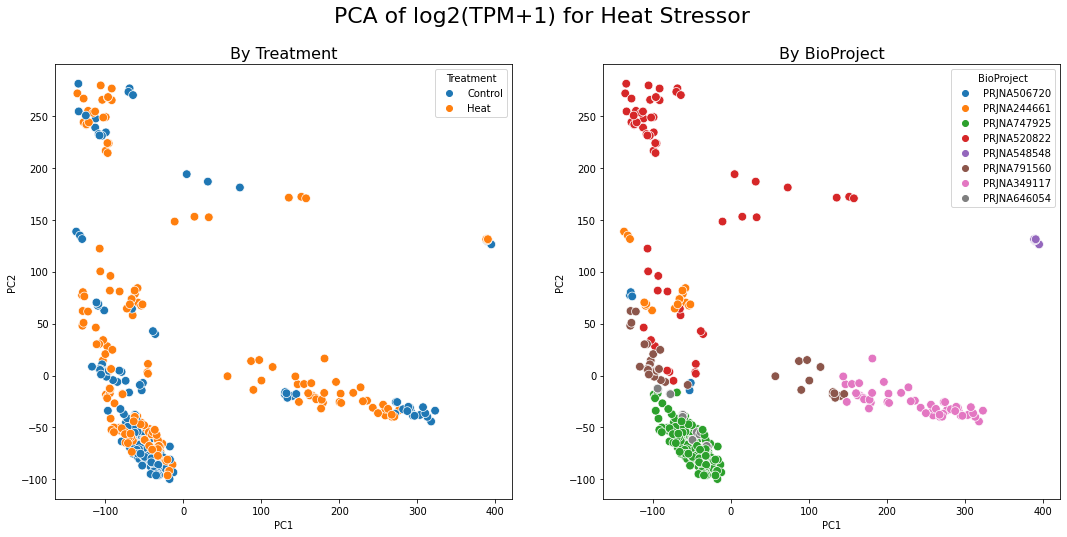

In [19]:
# make subplots colored by both treatment & BioProject
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,8))

a = sns.scatterplot(ax=ax[0],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Treatment"],s=75)
a.set_title("By Treatment",fontsize=16)

b = sns.scatterplot(ax=ax[1],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["BioProject"],s=75)
b.set_title("By BioProject",fontsize=16)

plt.suptitle("PCA of log2(TPM+1) for Heat Stressor",fontsize=22)
plt.savefig("../../figures/PCA_HeatOnly.pdf")

In [20]:
# make a function to generate these PCA plots for a given stressor
def stressor_pca(stressor,tpm):
    # find BioProjects for stressor
    sbp = []
    for b in tpm["BioProject"].unique():
        df = tpm[tpm["BioProject"]==b]
        if stressor in df["Treatment"].unique():
            sbp.append(b)
    
    # subset to contain only the stressor BioProjects
    stpm = tpm[tpm["BioProject"].isin(sbp)]
    if stressor != "Drought":
        if len(stpm["Treatment"].unique())>2:
            stpm = stpm[stpm["Treatment"].isin(["Control",stressor])]
    else:
        if len(stpm["Treatment"].unique())>3:
            stpm = stpm[stpm["Treatment"].isin(["Control",stressor,"DroughtRepeat"])]
    
    # split off metadata temporarily
    meta = stpm[["Sample","BioProject","Treatment"]]
    
    # set Sample as index and drop metadata from TPM
    stpm = stpm.set_index("Sample").drop(["BioProject","Treatment"],axis=1)
    
    # remove zero-variance features
    vttpm = variance_threshold_selector(stpm)
    
    # log-transform TPM
    vttpm_log = vttpm.apply(lambda x: np.log2(x+1))
    
    # run PCA and generate dataframe with PCs
    pca = PCA(n_components=2)
    real_PCs = pca.fit_transform(vttpm_log)
    real_PCs_df = pd.DataFrame(data = real_PCs, columns = ['PC1','PC2'])
    
    ## reset index (after running PCA)
    vttpm_log.reset_index(inplace=True)
    vttpm_log.rename(columns={"index":"Sample"},inplace=True)
    
    # merge metadata with vttpm_log again
    merged = meta.merge(vttpm_log)
    
    # append metadata to PCA df
    plotdf = pd.concat([real_PCs_df,merged[["Sample","BioProject","Treatment"]]],axis=1)
    
    # make subplots colored by both treatment & BioProject
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,8))

    a = sns.scatterplot(ax=ax[0],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Treatment"],s=75)
    a.set_title("By Treatment",fontsize=16)

    b = sns.scatterplot(ax=ax[1],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["BioProject"],s=75,palette="tab20")
    b.set_title("By BioProject",fontsize=16)

    plt.suptitle("PCA of log2(TPM+1) for "+stressor+" Stressor",fontsize=22)
    plt.savefig("../../figures/PCA_"+stressor+"Only.pdf")
    
    return pca.explained_variance_ratio_

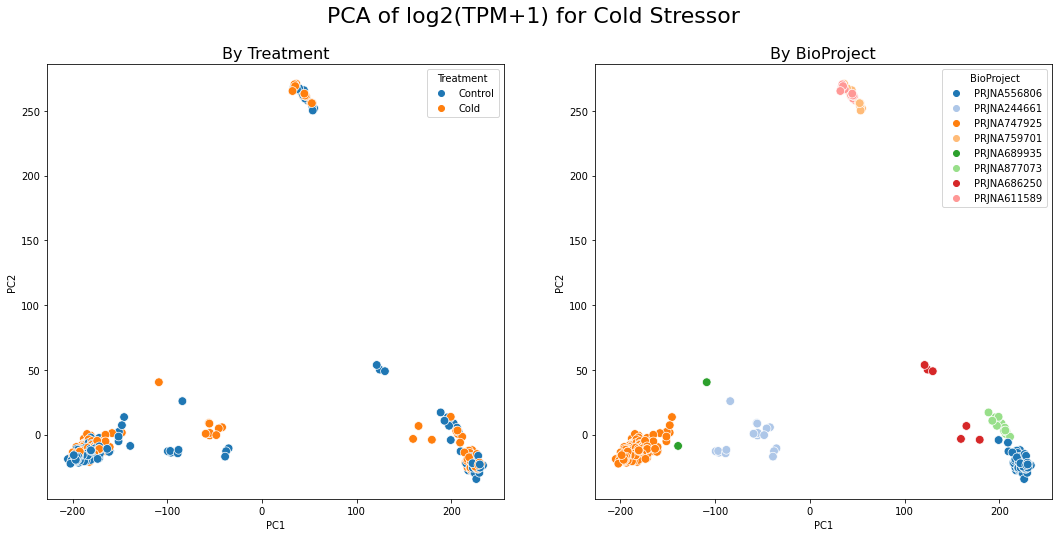

In [21]:
cevr = stressor_pca("Cold",tpm)

In [22]:
cevr

array([0.65721694, 0.06702751])

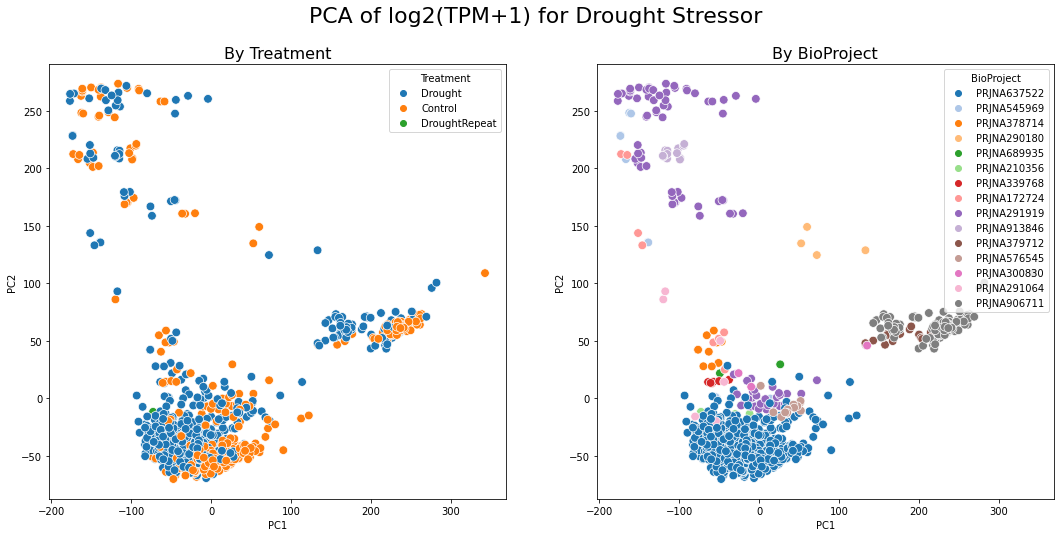

In [23]:
devr = stressor_pca("Drought",tpm)

In [24]:
devr

array([0.21539815, 0.16125189])

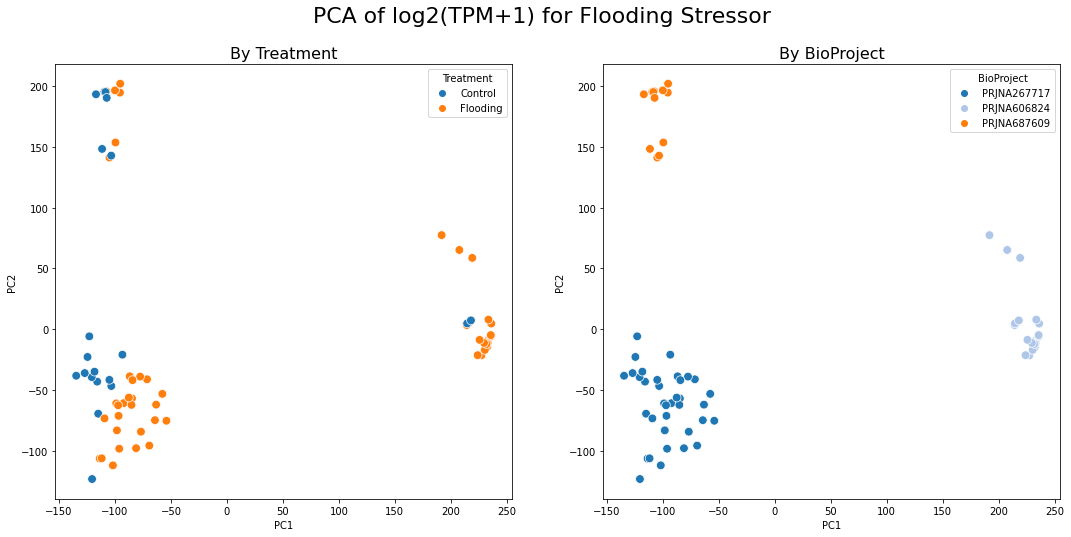

In [25]:
fevr = stressor_pca("Flooding",tpm)

In [26]:
fevr

array([0.503623  , 0.18675342])

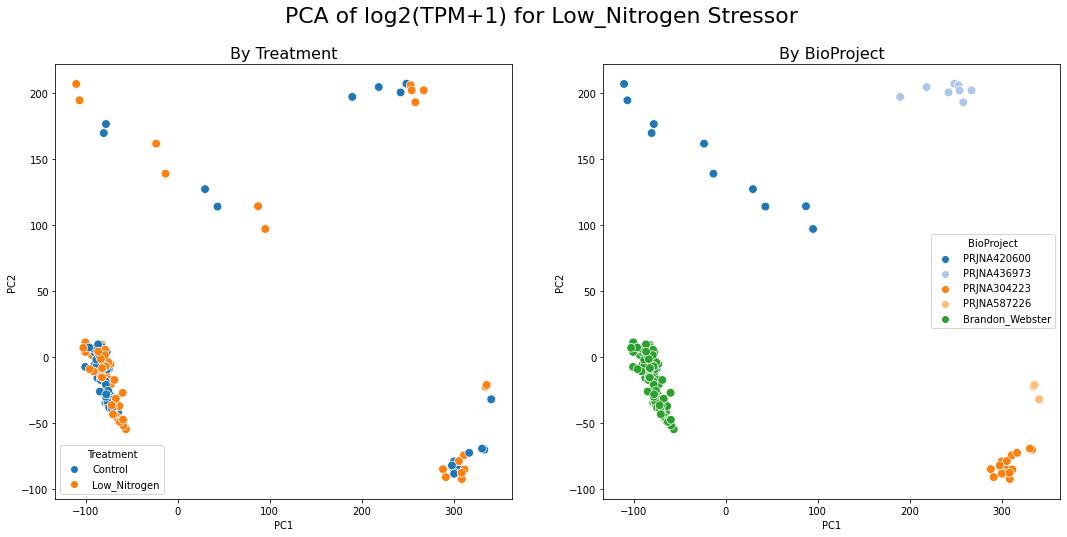

In [27]:
lnevr = stressor_pca("Low_Nitrogen",tpm)

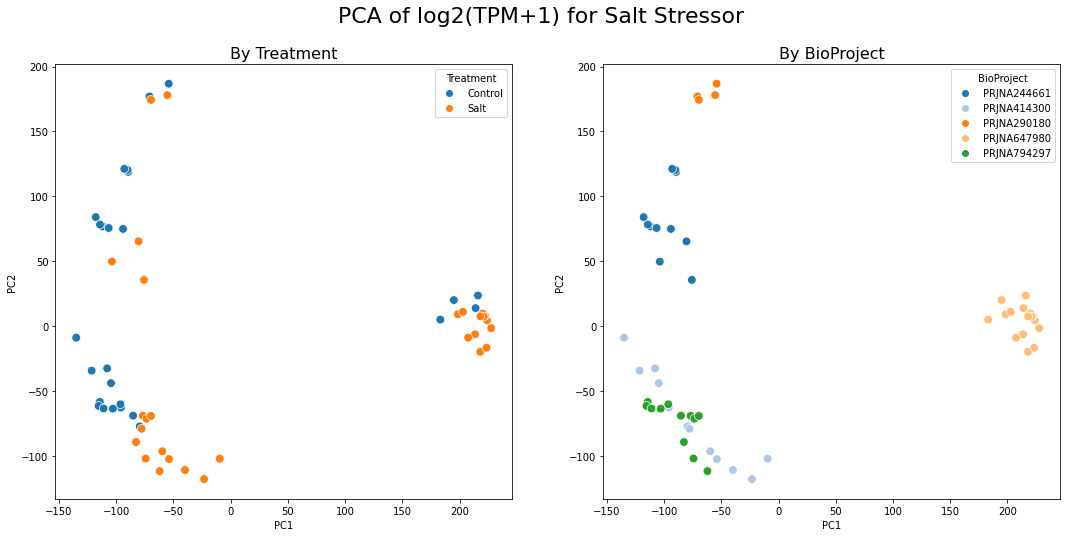

In [28]:
sevr = stressor_pca("Salt",tpm)

In [29]:
sevr

array([0.39854189, 0.13886696])

In [30]:
lnevr

array([0.500324  , 0.10684335])